<h1> Pet Finder k-NN Classification </h1>
<h4> A practice Jupyter notebook. </h4>

I create a k-NN classifier for adoption speed after preprocessing the Pet Finder data in 'train/train.csv'.
Adoption speed is an ordinal categorical variable which categorizes cats and dogs based on how quickly they were adopted.
The goal of the k-NN classifier is to predict how quickly a new cat or dog will be adopted.
I will preprocess the data by selecting relevant features, and then I will build the model based on a simple KDTree.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import time

In [2]:
# visualize header and first few rows of the dataset
!head -5 train/train.csv

Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2
2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0
1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her

In [3]:
# read the data into a pandas dataframe
df = pd.read_csv('train/train.csv', index_col='PetID')
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,3.0,2


In [4]:
#describe the data
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [5]:
# check for null values
df.isnull().any()

Type             False
Name              True
Age              False
Breed1           False
Breed2           False
Gender           False
Color1           False
Color2           False
Color3           False
MaturitySize     False
FurLength        False
Vaccinated       False
Dewormed         False
Sterilized       False
Health           False
Quantity         False
Fee              False
State            False
RescuerID        False
VideoAmt         False
Description       True
PhotoAmt         False
AdoptionSpeed    False
dtype: bool

In [6]:
df.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [7]:
# fill null values with an empty string, since there are only null string objects
df = df.fillna('')

In [8]:
# generate new features from the length of the description and the length of the name
df['Description Length'] = df['Description'].apply(lambda x: len(x))
df['Description Length'].head()

PetID
86e1089a3    359
6296e909a    118
3422e4906    393
5842f1ff5    146
850a43f90    390
Name: Description Length, dtype: int64

In [9]:
df['Name Length'] = df['Name'].apply(lambda x: len(x))
df['Name Length'].head()

PetID
86e1089a3     6
6296e909a    11
3422e4906     6
5842f1ff5     4
850a43f90     6
Name: Name Length, dtype: int64

In [10]:
# select most relevant features
features = ['Type', 'Name Length', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', \
            'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', \
            'State', 'VideoAmt', 'Description Length', 'PhotoAmt']

In [11]:
# store the predictors in X and the labels in y
X = df[features]
y = df['AdoptionSpeed']

In [12]:
#split data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=168)

In [13]:
from sklearn.neighbors import KDTree

# build nearest neighbor structure on training data
t_before = time.time()
kd_tree = KDTree(X_train)
t_after = time.time()

# compute training time
t_training = t_after - t_before
print('Time to build model (s): {}'.format(t_training))

t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(X_test, k=1, return_distance=False))
kd_tree_predictions = y_train[test_neighbors]
t_after = time.time()

t_test = t_after - t_before
print('Time to classify training set: {}'.format(t_test))

Time to build model (s): 0.03599905967712402
Time to classify training set: 0.13202977180480957


In [14]:
# calculate error of the k-NN classifier
err_positions = np.not_equal(kd_tree_predictions, y_test)
error = float(np.sum(err_positions))/len(y)

print('Error: {}'.format(error))

Error: 0.20456212899353032


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


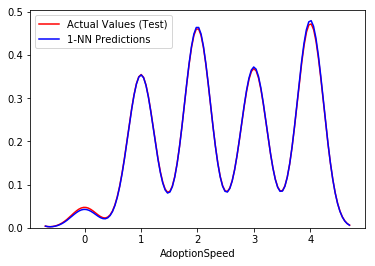

In [15]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color='red', label='Actual Values (Test)')
sns.distplot(kd_tree_predictions, hist=False, color='b', label='1-NN Predictions', ax=ax1)

In [16]:
df_test = pd.read_csv('test/test.csv',index_col='PetID')
df_test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt
PetID,,,,,,,,,,,,,,,,,,,,,
378fcc4fc,1,Puppy,2,307,0,1,1,0,0,2,...,2,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",3.0
73c10e136,2,London,24,266,0,1,2,7,0,2,...,1,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,1.0
72000c4c5,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,1.0
e147a4b9f,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",1.0
43fbba852,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,1.0


In [17]:
df_test=df_test.fillna('')
df_test['Description Length'] = df_test['Description'].apply(lambda x: len(x))
df_test['Name Length'] = df_test['Name'].apply(lambda x: len(x))
predictions = y_train[np.squeeze(kd_tree.query(df_test[features], k=1, return_distance=False))]
predictions.head()

PetID
500728fdd    2
a226d8246    4
4ffa77f1c    1
020fbbc9d    4
7986a1870    2
Name: AdoptionSpeed, dtype: int64

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


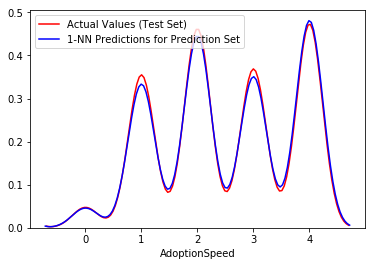

In [18]:
ax1 = sns.distplot(y_test, hist=False, color='red', label='Actual Values (Test Set)')
sns.distplot(predictions, hist=False, color='b', label='1-NN Predictions for Prediction Set', ax=ax1)

In [19]:
#creating a confusion matrix

cm = np.zeros((len(y_train.unique()),len(y_train.unique())))
for i,j in zip(y_test,predictions):
    cm[i,j] += 1

print(cm)

[[  6.  22.  21.  23.  38.]
 [ 19. 167. 205. 184. 249.]
 [ 27. 207. 291. 226. 313.]
 [ 18. 172. 240. 176. 248.]
 [ 39. 226. 306. 226. 299.]]
